In [10]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import datetime as dt
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
lat_range = (21.07553702762837, 21.183778180226838)
lon_range = (72.63445103547193, 72.73881989435432)
time_range = ('2022-01-15', '2023-05-01')
# lat = 15.80
# lon = 80.90
# buffer = 0.15
# date = '2023-02-15'
# latitude = (lat - buffer, lat + buffer)
# longitude = (lon - buffer, lon + buffer)

# # Specify the date range
# # Calculated as today's date, subtract 730 days to collect two years of data
# # Dates are converted to strings as required by loading function below
# end_date = dt.datetime.strptime(date, "%Y-%m-%d")
# start_date = end_date - dt.timedelta(days=730)

# time = (start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))
# # products = ["s2a_sen2cor_granule"]

# query = {
#     'x': longitude,
#     'y': latitude,
#     'time': time,
#             'measurements': [
#         'red',
#         'green',
#         'blue',
#         'nir',
#         'B11_20m'
#     ],
#     'output_crs': 'EPSG:6933',
#     'resolution': (-20, 20)
# }

# # Load the data and mask out bad quality pixels
# ds = load_ard(dc, products=["s2a_sen2cor_granule"], min_gooddata=0.5, **query)
ds = load_ard(dc,products=["landsat_8_c2_l2"],min_gooddata = 0.1,
                 measurements=["red","green","blue", "nir"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-10, 10))
print(ds)

Using pixel quality parameters for USGS Collection 2
Finding datasets
    landsat_8_c2_l2
<xarray.DataArray 'pixel_quality' (time: 3, y: 1291, x: 1008)>
dask.array<ne, shape=(3, 1291, 1008), dtype=bool, chunksize=(1, 1291, 1008), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2022-09-14T10:15:14 ... 2023-04-29T08:...
  * y            (y) float64 2.643e+06 2.643e+06 2.643e+06 ... 2.63e+06 2.63e+06
  * x            (x) float64 7.008e+06 7.008e+06 ... 7.018e+06 7.018e+06
    spatial_ref  int32 6933
Counting good quality pixels for each time step <class 'xarray.core.dataarray.DataArray'> <xarray.DataArray 'pixel_quality' (time: 3, y: 1291, x: 1008)>
dask.array<logical_or, shape=(3, 1291, 1008), dtype=bool, chunksize=(1, 1291, 1008), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2022-09-14T10:15:14 ... 2023-04-29T08:...
  * y            (y) float64 2.643e+06 2.643e+06 2.643e+06 ... 2.63e+06 2.63e+06
  * x            (x) float64 7.

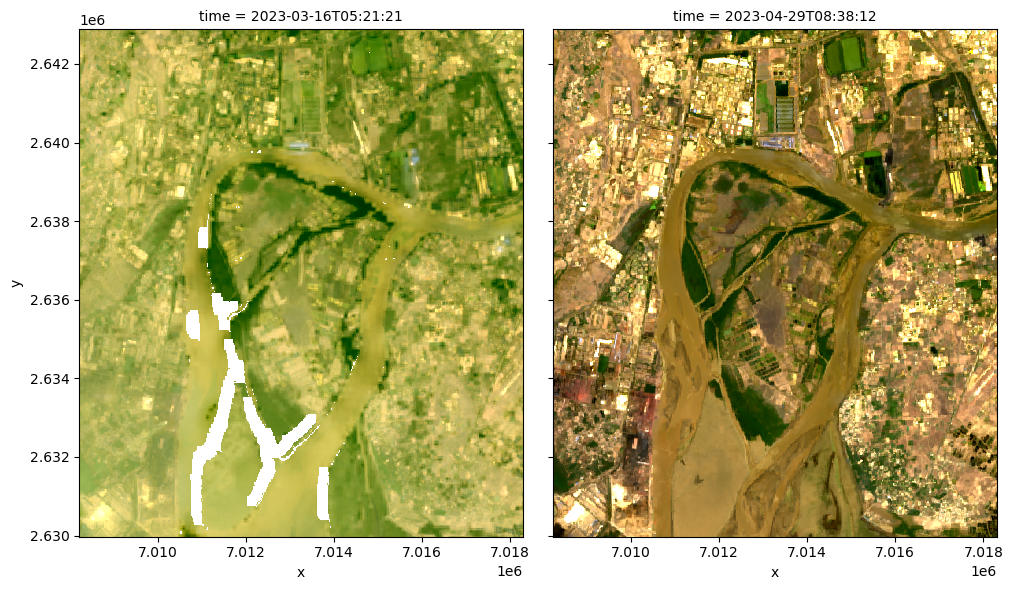

In [11]:
# Load the data from the Datacube
dataset = ds
# scl = ds['SCL_20m']
# clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
# print(clear_pixels)
# ndvi_masked = ndvi.where(clear_pixels)
# print(ndvi_masked)
rgb(ds, bands=['red', 'green', 'blue'], index=[0,1])

In [3]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.nir - dataset.red
band_sum = dataset.nir + dataset.red

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print(ndvi)

<xarray.DataArray (time: 2, y: 431, x: 337)>
array([[[ 5.2989025e-02,  5.9473354e-02,  8.9491129e-02, ...,
          2.6797125e-01,  2.6088354e-01,  3.0013826e-01],
        [ 1.3212848e-01,  9.5379151e-02,  1.0211597e-01, ...,
          2.6797125e-01,  2.6088354e-01,  3.0013826e-01],
        [ 1.2805121e-01,  1.1205987e-01,  1.0902883e-01, ...,
          2.6475587e-01,  2.3818704e-01,  2.5671986e-01],
        ...,
        [ 1.7002784e-02, -1.3261595e-02, -1.5853871e-02, ...,
          1.4439575e-02,  8.4748909e-02,  1.4237331e-01],
        [-1.2971410e-02, -7.9950895e-03, -1.1072356e-02, ...,
          1.0690394e-01,  1.5074523e-01,  1.4333220e-01],
        [-2.7814193e-04, -2.4731045e-03,  4.5506572e-03, ...,
          1.2920752e-01,  1.3110237e-01,  1.2815319e-01]],

       [[ 8.6363457e-02,  1.3597371e-01,  1.5183130e-01, ...,
          1.6152710e-01,  2.4386393e-01,  3.9601991e-01],
        [ 1.4362796e-01,  1.3369192e-01,  1.3935748e-01, ...,
          1.6152710e-01,  2.4386393e-0

<Figure size 800x800 with 0 Axes>

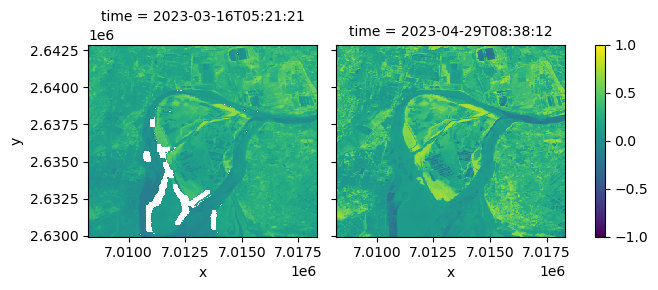

In [4]:
plt.figure(figsize=(8, 8))
ndvi.plot(col='time', vmin=-1, vmax=1, col_wrap=2)
plt.show()